## Project: Behavioral Risk Factors

#### Team Members
Amit Sharma\
Pranav Karmalkar\
Swapnil Parihar

In [41]:
import pandas as pd
import numpy as np
import time
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from matplotlib import pyplot
import re
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
import matplotlib.pyplot as plt

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
data_2015 = pd.read_csv('MENT2015R.csv')

In [21]:
# See the names of the columns in the dataframe
L = sorted(data_2015.columns)

for i in L:
    print(i)

ADDEPEV2
ALCDAY5
ARTHSOCL
BEANDAY_
CHECKUP1
CHILDREN
CHOLCHK
DRNK3GE5
DROCDY3_
EDUCA
EMPLOY1
EXERHMM1
EXERHMM2
EXEROFT1
EXEROFT2
EXRACT11
EXRACT21
FC60_
FLSHTMY2
FMONTH
FRUIT1
FRUITJU1
FRUTDA1_
FTJUDA1_
FVBEANS
FVGREEN
FVORANG
GENHLTH
GRENDAY_
HEIGHT3
HIVTSTD3
HTIN4
HTM4
IMFVPLAC
INCOME2
MARITAL
MAXDRNKS
MAXVO2_
MEDCOST
MENTHLTH
METVL11_
METVL21_
ORNGDAY_
PA1MIN_
PA1VIGM_
PADUR1_
PADUR2_
PAFREQ1_
PAFREQ2_
PAMIN11_
PAMIN21_
PHYSHLTH
QSTVER
RENTHOM1
SEQNO
STRENGTH
STRFREQ_
VEGEDA1_
VEGETAB1
WEIGHT2
WTKG3


In [54]:
# Target Column variations available
data_2015['MENTHLTH'].value_counts()

88.0    301076
30.0     22184
2.0      21229
5.0      14749
1.0      13658
3.0      12253
10.0     10684
15.0      9795
4.0       6259
20.0      5944
7.0       5667
77.0      5204
14.0      2229
99.0      2204
25.0      2081
6.0       1730
8.0       1140
12.0       706
28.0       591
21.0       404
29.0       333
9.0        203
18.0       178
16.0       174
27.0       154
22.0       116
17.0       101
13.0        93
26.0        76
11.0        73
23.0        70
24.0        67
19.0        31
Name: MENTHLTH, dtype: int64

### Reduction of input clolumn classes to improve Classifier speed (Optional) - May add bias in data

In [32]:
data_2015['ADDEPEV2'].replace(7, 2, inplace=True)
data_2015['ADDEPEV2'].replace(9, 1, inplace=True)
data_2015['INCOME2'].replace([77,99], 0, inplace=True)
data_2015['INCOME2'].fillna(0, inplace = True)
data_2015['PHYSHLTH'].replace([77,99,88], 0, inplace=True)
data_2015['PHYSHLTH'].fillna(0, inplace = True)
data_2015['GENHLTH'].replace([2,3], 1, inplace=True)
data_2015['GENHLTH'].replace([4,5], 2, inplace=True)
data_2015['GENHLTH'].replace([7,9], np.NaN, inplace=True)
data_2015['GENHLTH'].fillna(0, inplace = True)

data_2015['CHILDREN'].replace([i for i in range(1,55)],1,inplace = True)
data_2015['CHILDREN'].replace([88,99,77],0,inplace = True)

data_2015['MAXDRNKS'].replace([77,99,88], 0, inplace=True)
data_2015['MAXDRNKS'].replace([i for i in range(6,77)], 6, inplace=True)

In [56]:
# Not needed since the column has no Nan values

#data_2015['MENTHLTH'].unique()
data_2015.dropna(subset=['MENTHLTH'],inplace=True)

In [57]:
# Generate Test and training data set

predict_set = data_2015.loc[data_2015.MENTHLTH.isin([77,99])]
training_set = data_2015.loc[~data_2015.MENTHLTH.isin([77,99])]

In [58]:
# Generate predict and training target set

training_target = training_set[['MENTHLTH']]
predict_target = predict_set[['MENTHLTH']]

In [59]:
# Drop the target columns from the training data
training_set.drop(columns=['MENTHLTH','ADDEPEV2'],inplace=True)
predict_set.drop(columns=['MENTHLTH','ADDEPEV2'],inplace=True)

In [60]:
# Replace all the categories in the column by in Yes and No category

training_target['MENTHLTH'].replace(88, 0, inplace=True)
for i in range(1,31):
    training_target['MENTHLTH'].replace(i, 1, inplace=True)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)

In [20]:
# Grid Search function to determine best hyper-paramters for the model
def gridSearch_func(model,tree_parameters,score):
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(model, tree_parameters, scoring='%s_weighted' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

## XGBoost Algorithm Hyperparamter tunning

In [21]:
# Parameter selection for maodel training

model = XGBClassifier()
#tree_parameters = {'learning_rate': [0.1, 0.2, 0.01],'max_depth': [3,5,6,8],'n_estimators': [10, 20, 50, 100, 200]}
tree_parameters = {'learning_rate': [0.8, 1 , 0.5],'max_depth': [5,6,10],'n_estimators': [70,100]}
scores = ['recall']

In [22]:
# GridSearch for XGboost
# Best parameters set found on development set:{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 100}
time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'XGBoost + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for recall

Best parameters set found on development set:

{'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 70}

Grid scores on development set:

0.765 (+/-0.002) for {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 70}
0.763 (+/-0.002) for {'learning_rate': 0.8, 'max_depth': 5, 'n_estimators': 100}
0.761 (+/-0.002) for {'learning_rate': 0.8, 'max_depth': 6, 'n_estimators': 70}
0.759 (+/-0.002) for {'learning_rate': 0.8, 'max_depth': 6, 'n_estimators': 100}
0.734 (+/-0.002) for {'learning_rate': 0.8, 'max_depth': 10, 'n_estimators': 70}
0.732 (+/-0.004) for {'learning_rate': 0.8, 'max_depth': 10, 'n_estimators': 100}
0.761 (+/-0.001) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 70}
0.759 (+/-0.001) for {'learning_rate': 1, 'max_depth': 5, 'n_estimators': 100}
0.756 (+/-0.003) for {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 70}
0.751 (+/-0.003) for {'learning_rate': 1, 'max_depth': 6, 'n_estimators': 100}
0.723 (+/-0.003) for {'

In [62]:
# Re-train the model on the best hyper parameters

model = XGBClassifier(learning_rate= 0.5,max_depth= 5, n_estimators= 70)
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.5, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=70, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<BarContainer object of 59 artists>

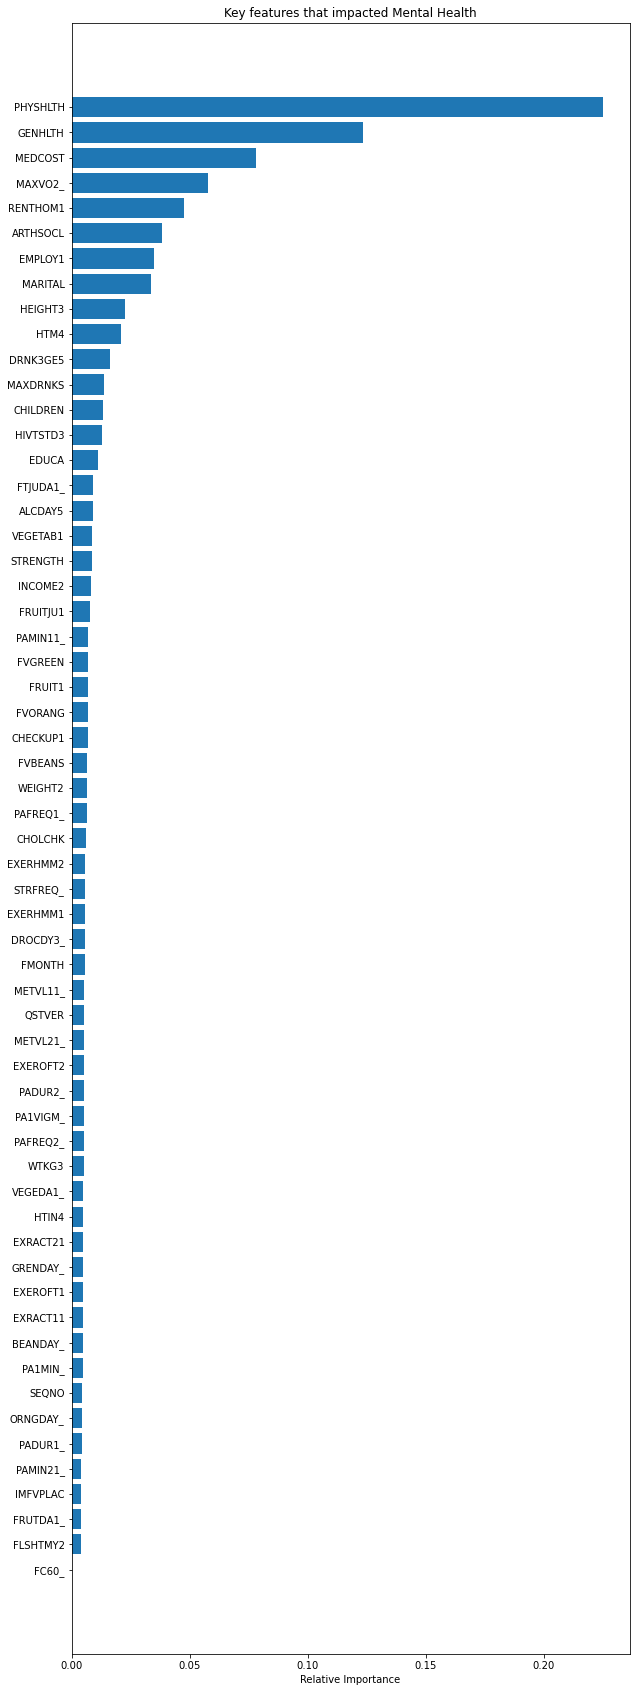

In [63]:
# Important features 

import matplotlib.pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,30))
plt.title('Key features that impacted Mental Health')
plt.xlabel('Relative Importance')
plt.barh(training_set.columns[sorted_idx], model.feature_importances_[sorted_idx])

Accuracy on test data: 0.74
Accuracy on training data: 0.75


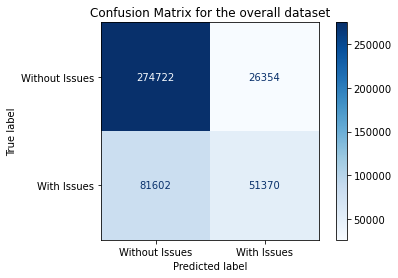

In [64]:
# Confusion matrix for the XGBoost model 

print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
disp = plot_confusion_matrix(model, training_set, training_target,display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

## Random Forest Algorithm 

In [65]:
# Other tree algorithms cannot work with Nan values .Converting them to a constant
training_set = training_set.fillna(0)

In [66]:

# Best parameters set found on development set: {'bootstrap': True, 'max_depth': 10, 'max_features': 18, 'n_estimators': 150}
model = RandomForestClassifier()
tree_parameters = {'bootstrap': [True],'max_depth': [10,15],'n_estimators': [100,150]}
#tree_parameters ={}
scores = scores = ['recall']
X_train, X_test, y_train, y_test = train_test_split(training_set, training_target,shuffle = True, test_size=0.2, random_state=42)

In [117]:
time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'RandomForestClassifier + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'bootstrap': True, 'max_depth': 10, 'max_features': 18, 'n_estimators': 150}

Grid scores on development set:

0.630 (+/-0.002) for {'bootstrap': True, 'max_depth': 7, 'max_features': 15, 'n_estimators': 150}
0.631 (+/-0.004) for {'bootstrap': True, 'max_depth': 7, 'max_features': 18, 'n_estimators': 150}
0.638 (+/-0.003) for {'bootstrap': True, 'max_depth': 9, 'max_features': 15, 'n_estimators': 150}
0.639 (+/-0.002) for {'bootstrap': True, 'max_depth': 9, 'max_features': 18, 'n_estimators': 150}
0.641 (+/-0.002) for {'bootstrap': True, 'max_depth': 10, 'max_features': 15, 'n_estimators': 150}
0.643 (+/-0.002) for {'bootstrap': True, 'max_depth': 10, 'max_features': 18, 'n_estimators': 150}

Detailed classification report:

              precision    recall  f1-score   support

         0.0       0.76      0.92      0.83     60394
         1.0       0.65      0.35      0.45     26416

    accuracy       

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 18, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy on test data: 0.74
Accuracy on training data: 0.75


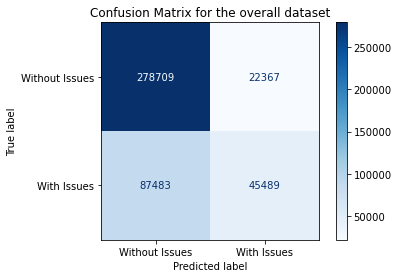

In [67]:
model = RandomForestClassifier(bootstrap= True,max_depth=10, max_features=18, n_estimators=150)
model.fit(X_train,y_train)
print(model.get_params())
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
disp = plot_confusion_matrix(model, training_set, training_target,display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

<BarContainer object of 59 artists>

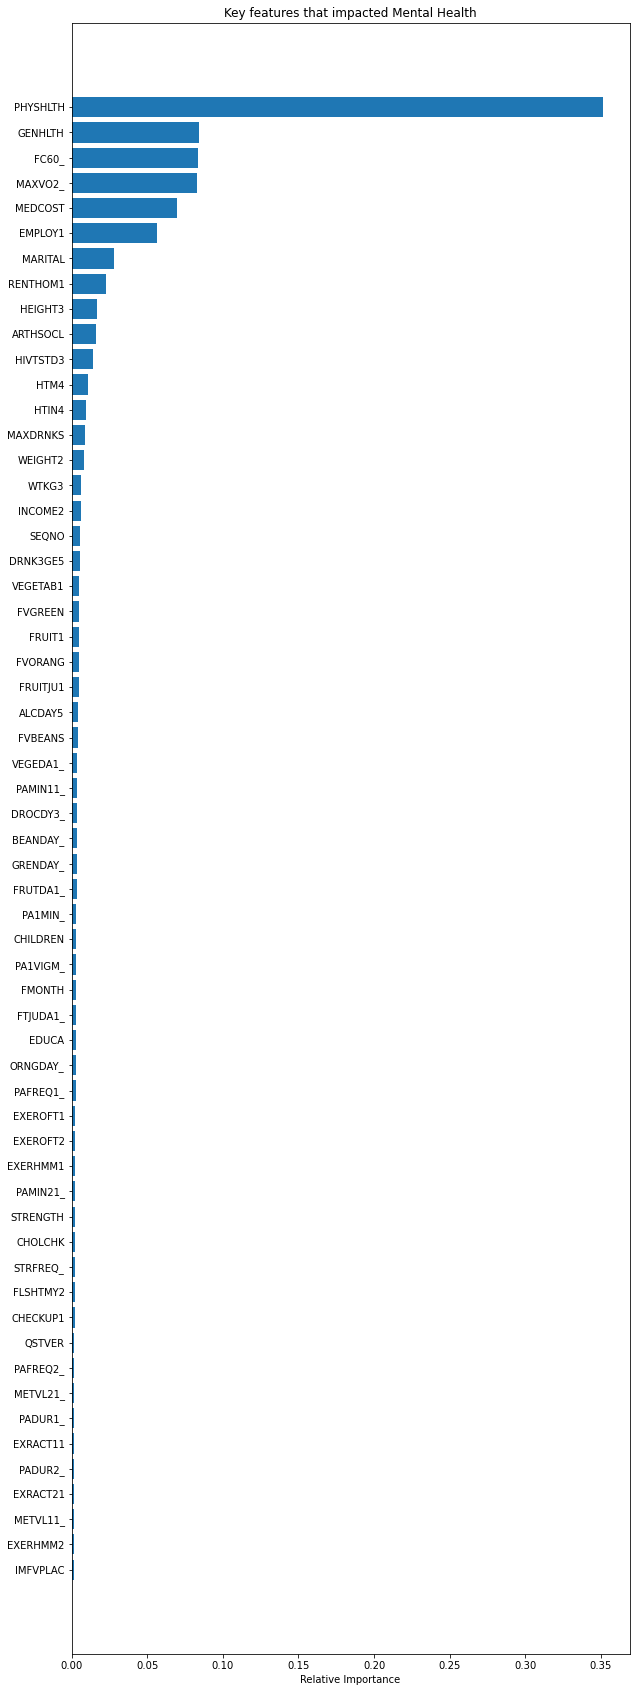

In [68]:
import matplotlib.pyplot as plt
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,30))
plt.title('Key features that impacted Mental Health')
plt.xlabel('Relative Importance')
plt.barh(training_set.columns[sorted_idx], model.feature_importances_[sorted_idx])

## Decision Tree Algorithm 

In [92]:
model = tree.DecisionTreeClassifier()
tree_parameters = [{'splitter': ['best', 'random'],'max_depth': [15,10,20],'criterion': ['gini', 'entropy']}]
scores = ['f1']

In [93]:
# Best parameters set found on development set: {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

time_dict={}
start_time = time.time()
gridSearch_func(model,tree_parameters,scores[0])
end_time = time.time()
time_dict[f'DecisionTreeClassifier + gridSearchCV + {scores[0]}'] = end_time - start_time

# Tuning hyper-parameters for f1

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

Grid scores on development set:

0.632 (+/-0.002) for {'criterion': 'gini', 'max_depth': 15, 'splitter': 'best'}
0.630 (+/-0.004) for {'criterion': 'gini', 'max_depth': 15, 'splitter': 'random'}
0.637 (+/-0.006) for {'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}
0.622 (+/-0.004) for {'criterion': 'gini', 'max_depth': 10, 'splitter': 'random'}
0.619 (+/-0.005) for {'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}
0.621 (+/-0.005) for {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}
0.632 (+/-0.005) for {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'best'}
0.628 (+/-0.008) for {'criterion': 'entropy', 'max_depth': 15, 'splitter': 'random'}
0.633 (+/-0.006) for {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}
0.621 (+/-0.013) for {'criterion': 'entropy', 'max_depth': 10, 'splitter': 'random'}
0.62

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}
Accuracy on test data: 0.73
Accuracy on training data: 0.74


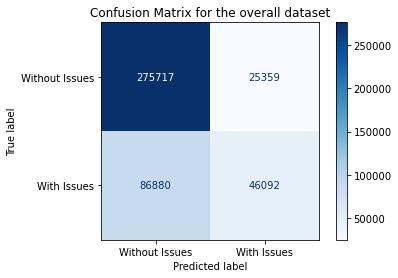

In [69]:
model = tree.DecisionTreeClassifier(criterion='gini',max_depth=10, splitter='best')
model.fit(X_train,y_train)
print(model.get_params())
print("Accuracy on test data: {:.2f}".format(model.score(X_test, y_test)))
print("Accuracy on training data: {:.2f}".format(model.score(X_train, y_train)))
disp = plot_confusion_matrix(model, training_set, training_target,display_labels=['Without Issues',"With Issues"],cmap=plt.cm.Blues)
disp.ax_.set_title('Confusion Matrix for the overall dataset')
plt.show()

<BarContainer object of 59 artists>

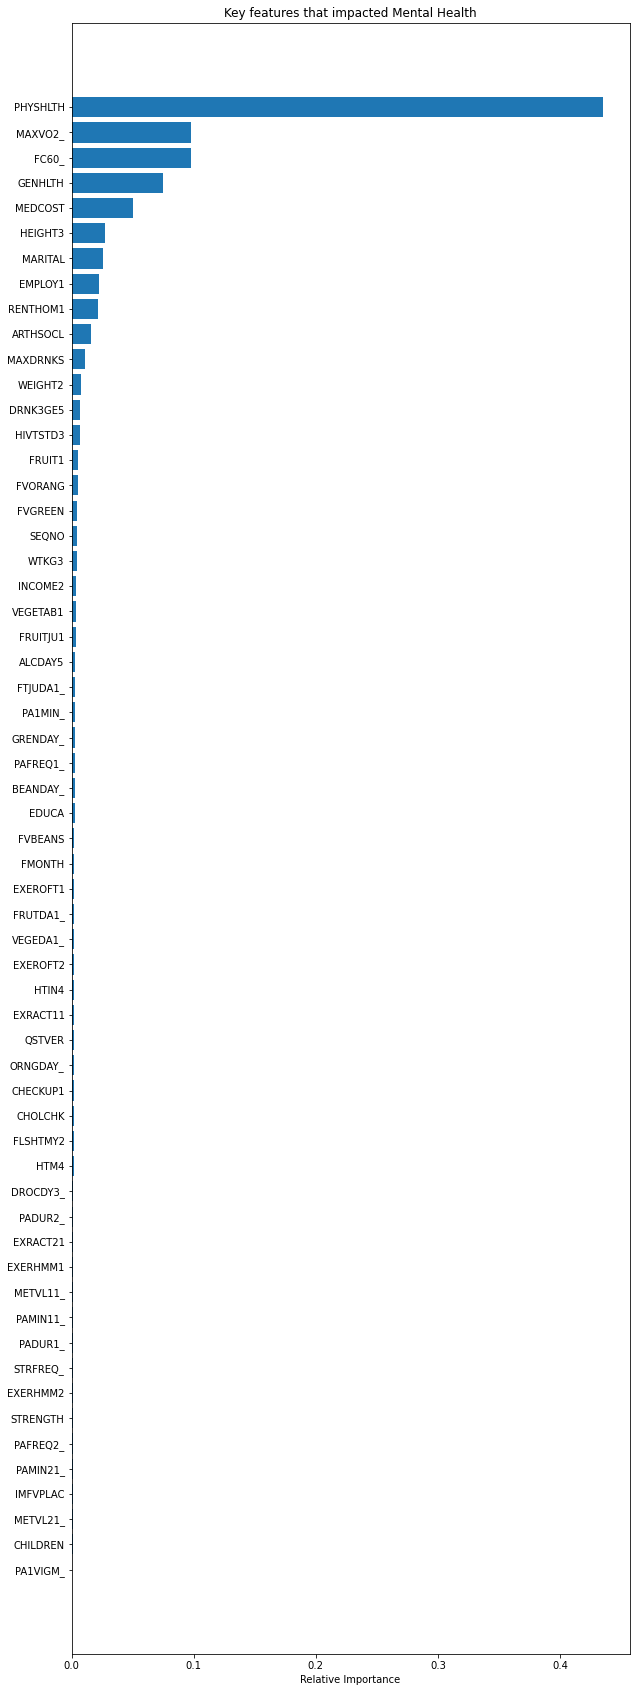

In [70]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(10,30))
plt.title('Key features that impacted Mental Health')
plt.xlabel('Relative Importance')
plt.barh(training_set.columns[sorted_idx], model.feature_importances_[sorted_idx])

## Logistic Regression 

In [71]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [72]:
y_pred=model.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      1.00      0.82     60394
         1.0       0.00      0.00      0.00     26416

    accuracy                           0.70     86810
   macro avg       0.35      0.50      0.41     86810
weighted avg       0.48      0.70      0.57     86810



### Final model selection
1. Both XGBoost and Random Forest give the same results in terms of accuracy. So any one of the two models can be selected
2. Below are the prediction results using random forest. Similar results can be generated using XGBoost

## Results on Prediction set (Random Forest)

In [85]:
model = RandomForestClassifier(bootstrap= True,max_depth=10, max_features=18, n_estimators=150)
model.fit(training_set,training_target)
print(model.get_params())
print("Accuracy on test data: {:.2f}".format(model.score(training_set,training_target)))
predict_set = predict_set.fillna(0)
y_pred = model.predict(predict_set)
predict = pd.DataFrame(data=y_pred, columns=["Predicted_random_forest"])

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 18, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 150, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}
Accuracy on test data: 0.75


In [86]:
predict.head()

,Predicted_random_forest
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [87]:
predict['Predicted_random_forest'].value_counts()

0.0    6147
1.0    1261
Name: Predicted_random_forest, dtype: int64

This shows that almost 17% of the individuals who refused to answer the question or were not sure about the answer could actually be suffering from mental health related issues.

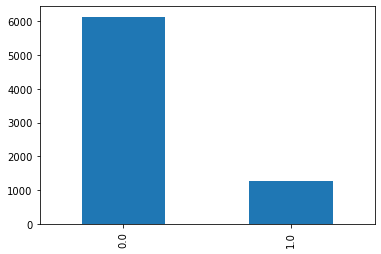

In [80]:
pd.value_counts(predict['Predicted_random_forest']).plot.bar()

## Results on Prediction set (XGBoost)

In [89]:
model = XGBClassifier(learning_rate= 0.5,max_depth= 5, n_estimators= 70)
model.fit(training_set,training_target)
print(model.get_params())
print("Accuracy on test data: {:.2f}".format(model.score(training_set,training_target)))
predict_set = predict_set.fillna(0)
y_pred = model.predict(predict_set)
predict["Predicted_XGBoost"] = pd.DataFrame(data=y_pred, columns=["Predicted_XGBoost"])

{'objective': 'binary:logistic', 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 1, 'gamma': 0, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.5, 'max_delta_step': 0, 'max_depth': 5, 'min_child_weight': 1, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 70, 'n_jobs': 0, 'num_parallel_tree': 1, 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'subsample': 1, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': None}
Accuracy on test data: 0.75


In [90]:
predict.head(10)

,Predicted_random_forest,Predicted_XGBoost
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
5,0.0,0.0
6,1.0,0.0
7,1.0,1.0
8,1.0,1.0
9,0.0,0.0


In [91]:
predict['Predicted_XGBoost'].value_counts()

0.0    5971
1.0    1437
Name: Predicted_XGBoost, dtype: int64

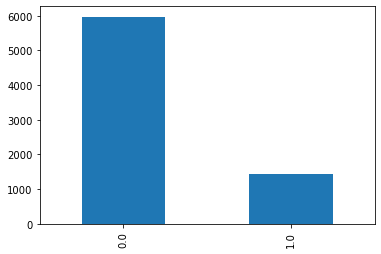

In [92]:
pd.value_counts(predict['Predicted_XGBoost']).plot.bar()

## Merging two results to improve upon low recall issue

In [94]:
result  = []
for index, row in predict.iterrows():
    if row['Predicted_XGBoost'] or row['Predicted_random_forest']:
        result.append(1)
    else:
        result.append(0)

predict['Predicted_Ensemble'] = pd.DataFrame(result,columns=['Final_Result'])
    

In [95]:
predict['Predicted_Ensemble'].value_counts()

0    5770
1    1638
Name: Predicted_Ensemble, dtype: int64

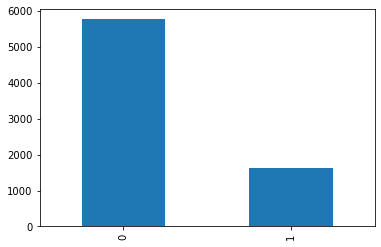

In [96]:
pd.value_counts(predict['Predicted_Ensemble']).plot.bar()

In [97]:
# Converting results to CSV 
compression_opts = dict(method='zip',archive_name='FinalResults.csv')  
predict.to_csv('FinalResults.zip', index=False,compression=compression_opts) 

## Other visualizations 

In [28]:
drawing_function = training_set.copy()
drawing_function['MENTHLTH'] = training_target['MENTHLTH']

<Figure size 720x1440 with 0 Axes>

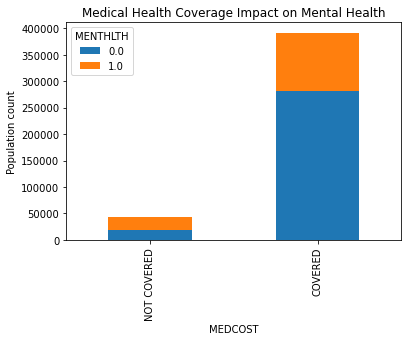

In [139]:
plt.figure(figsize=(10,20))
drawing_function['MEDCOST'].replace([9,7,0], 2, inplace=True)
drawing_function.groupby(['MEDCOST','MENTHLTH']).size().unstack().plot(kind='bar',stacked=True)
positions = (0, 1)
labels = ("NOT COVERED", "COVERED")
plt.xticks(positions, labels)
plt.title("Medical Health Coverage Impact on Mental Health")
plt.ylabel('Population count')
plt.show()

<Figure size 720x1440 with 0 Axes>

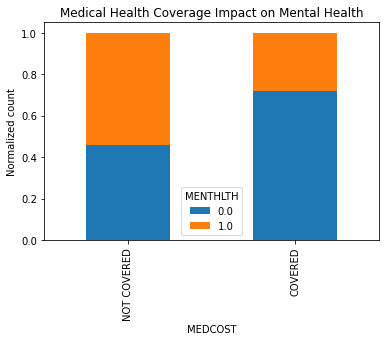

In [184]:
plt.figure(figsize=(10,20))
drawing_function['MEDCOST'].replace([9,7,0], 2, inplace=True)
k = drawing_function.groupby(['MEDCOST','MENTHLTH']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()
to_plot_pct.plot(kind='bar',stacked=True)

positions = (0, 1)
labels = ("NOT COVERED", "COVERED")
plt.xticks(positions, labels)
plt.title("Medical Health Coverage Impact on Mental Health")
plt.ylabel('Normalized count')
plt.show()

<Figure size 1440x720 with 0 Axes>

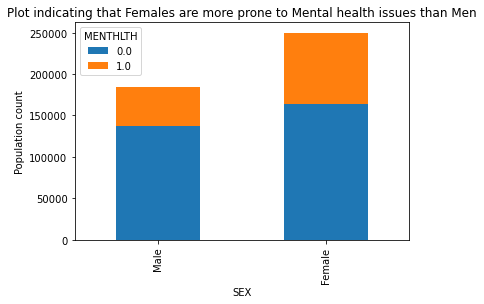

In [135]:
plt.figure(figsize=(20,10))
drawing_function.groupby(['SEX','MENTHLTH']).size().unstack().plot(kind='bar',stacked=True)
positions = (0, 1)
labels = ("Male", "Female")
plt.xticks(positions, labels)
plt.title("Gender Distribution and Impact on Mental Health")
plt.ylabel('Population count')
plt.show()

<Figure size 1440x720 with 0 Axes>

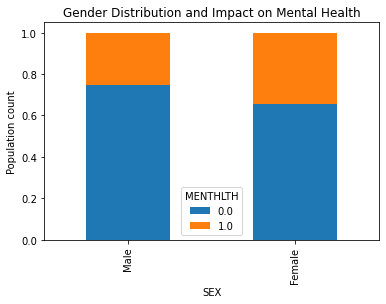

In [196]:
plt.figure(figsize=(20,10))
k = drawing_function.groupby(['SEX','MENTHLTH']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()
to_plot_pct.plot(kind='bar',stacked=True)


positions = (0, 1)
labels = ("Male", "Female")
plt.xticks(positions, labels)
plt.title("Gender Distribution and Impact on Mental Health")
plt.ylabel('Population count')
plt.show()

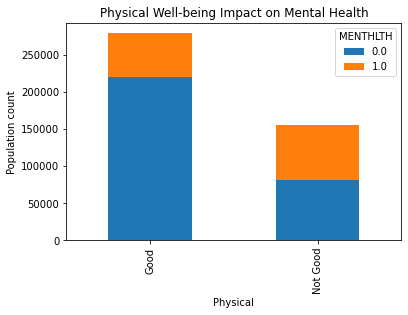

In [170]:
drawing_function['PHYSHLTH'].replace([77,88,99],0, inplace=True)
drawing_function['PHYSHLTH'].replace([i for i in range(1,31)],1, inplace=True)
drawing_function.groupby(['PHYSHLTH','MENTHLTH']).size().unstack().plot(kind='bar',stacked=True)
positions = (0, 1)
labels = ("Good", "Not Good")
plt.xticks(positions, labels)
plt.title("Physical Well-being Impact on Mental Health")
plt.ylabel('Population count')
plt.xlabel('Physical')
plt.show()


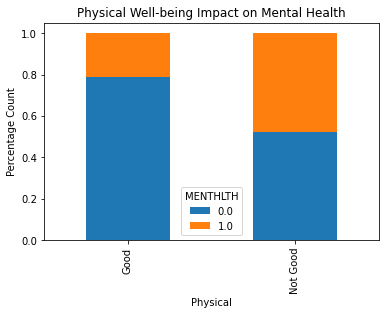

In [181]:
k = drawing_function.groupby(['PHYSHLTH','MENTHLTH']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()

to_plot_pct.plot(kind='bar',stacked=True)
positions = (0, 1)
labels = ("Good", "Not Good")
plt.xticks(positions, labels)
plt.title("Physical Well-being Impact on Mental Health")
plt.ylabel('Percentage Count')
plt.xlabel('Physical')
plt.show()

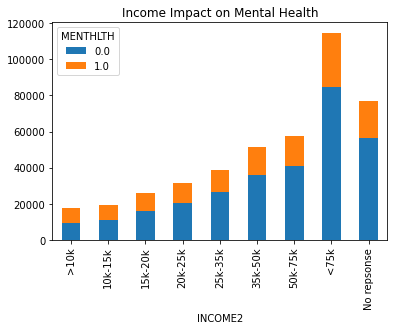

In [176]:
drawing_function['INCOME2'].replace([0,77,99],9,inplace = True)
drawing_function.groupby(['INCOME2','MENTHLTH']).size().unstack().plot(kind='bar',stacked=True)
positions = (0,1,2,3,4,5,6,7,8)
labels = (">10k", "10k-15k","15k-20k","20k-25k","25k-35k","35k-50k","50k-75k","<75k",'No repsonse')
plt.xticks(positions, labels)
plt.title("Income Impact on Mental Health")
plt.show()

In [165]:
def hard_replace_income(k):
    k.replace(9327,9327/17877,inplace = True)
    k.replace(8550,8550/17877,inplace = True)

    k.replace(10754,10754/19061,inplace = True)
    k.replace(8307,8307/19061,inplace = True)

    k.replace(16243,16243/(16243+9974),inplace = True)
    k.replace(9974,9974/(16243+9974),inplace = True)

    k.replace(26335,26335/(26335+12296),inplace = True)
    k.replace(12296,12296/(12296+26335),inplace = True)

    k.replace(20475.000000,20475/(20457+11297),inplace = True)
    k.replace(11297,11297/(11297+20457),inplace = True)

    k.replace(36119,36119/(36119+15352),inplace = True)
    k.replace(15352,15352/(15352+36119),inplace = True)

    k.replace(40939,40939/(40939+16669),inplace = True)
    k.replace(16669,16669/(16669+40939),inplace = True)

    k.replace(84464,84464/(84464+30162),inplace = True)
    k.replace(30162,30162/(30162+84464),inplace = True)

    k.replace(56420,56420/(56420+20365),inplace = True)
    k.replace(20365,20365/(20365+56420),inplace = True)
    return k

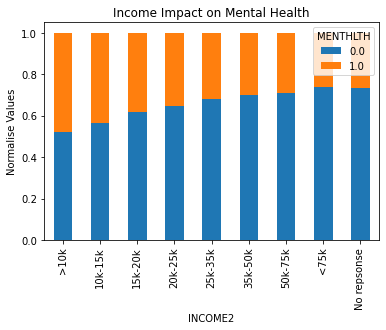

In [179]:

k = drawing_function.groupby(['INCOME2','MENTHLTH']).size()
k = hard_replace_income(k)
k.unstack().plot(kind='bar',stacked=True)
positions = (0,1,2,3,4,5,6,7,8)
labels = (">10k", "10k-15k","15k-20k","20k-25k","25k-35k","35k-50k","50k-75k","<75k",'No repsonse')
plt.xticks(positions, labels)
plt.title("Income Impact on Mental Health")
plt.ylabel('Normalise Values')
plt.show()

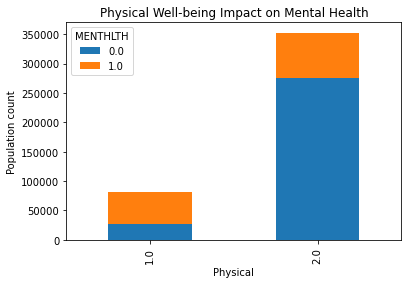

In [33]:
drawing_function['ADDEPEV2'].replace([7,9],2, inplace=True)
#drawing_function['ADDEPEV2'].replace([i for i in range(1,31)],1, inplace=True)
drawing_function.groupby(['ADDEPEV2','MENTHLTH']).size().unstack().plot(kind='bar',stacked=True)
positions = (0, 1)
#labels = ("Good", "Not Good")
#plt.xticks(positions, labels)
plt.title("Physical Well-being Impact on Mental Health")
plt.ylabel('Population count')
plt.xlabel('Physical')
plt.show()

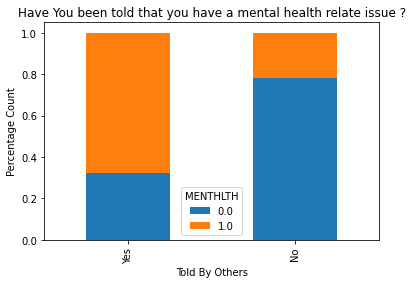

In [35]:
k = drawing_function.groupby(['ADDEPEV2','MENTHLTH']).size()

to_plot =k.unstack()
to_plot_transpose = to_plot.transpose()
to_plot_transpose_pct = to_plot_transpose.div(to_plot_transpose.sum())
to_plot_pct=to_plot_transpose_pct.transpose()

to_plot_pct.plot(kind='bar',stacked=True)
positions = (0, 1)
labels = ("Yes", "No")
plt.xticks(positions, labels)
plt.title("Have You been told that you have a mental health relate issue ?")
plt.ylabel('Percentage Count')
plt.xlabel('Told By Others')
plt.show()